In [1]:
from cmath import sqrt
from cmath import pi
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange, tqdm_notebook
EPS = 1e-5
PLOT_STEP = 5 * 1e-4
STOP_IND = 20
def newton_method(start: complex, need_iteration_sequence = False):
    iteration_sequence = [start]
    change = 1
    prev: complex
    next = start
    ind = 1
    while change >= EPS and ind < STOP_IND:
        prev = next
        next = prev - ((prev ** 3 - (1 + 0j)) / (3 * prev ** 2))
        change = abs(next - prev)
        if need_iteration_sequence:
            iteration_sequence.append(next)
        ind += 1
    return next, np.array(iteration_sequence)

def calc_root_pools():
    first_root_pool = []  
    second_root_pool = []  
    third_root_pool = []
    uncorrected_root_pool = []
    firs_root = 1 + 0j
    second_root = complex(-0.5, (sqrt(3)/2))
    third_root = complex(-0.5, -(sqrt(3)/2))
    line = np.arange(-2, 2, step = PLOT_STEP)
    for real in tqdm_notebook(line, desc = '1st'):
        for image in line:
            root, _ = newton_method(complex(real, image))
            if abs(root - firs_root) < EPS:
                first_root_pool.append((real, image))
            elif abs(root - second_root) < EPS:                
                second_root_pool.append((real, image))
            elif abs(root - third_root) < EPS:
                third_root_pool.append((real,image))
            else:
                uncorrected_root_pool.append((real, image))
    return np.array(first_root_pool, dtype=tuple),\
           np.array(second_root_pool, dtype=tuple),\
           np.array(third_root_pool, dtype=tuple),\
           np.array(uncorrected_root_pool, dtype=tuple)       

first_root_pool, second_root_pool,third_root_pool, uncorrected_root_pool = calc_root_pools()

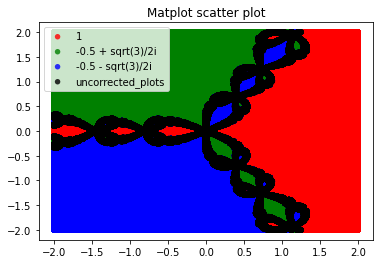

In [2]:
data = (np.transpose(first_root_pool), np.transpose(second_root_pool), np.transpose(third_root_pool), np.transpose(uncorrected_root_pool))            
colors = ("red", "green", "blue", "black")
groups = ("1", "-0.5 + sqrt(3)/2i", "-0.5 - sqrt(3)/2i", "uncorrected_plots")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for point, color, group in zip(data, colors, groups):
    if point.size >= 2:
        x, y = point
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()
    